In [1]:
import numpy as np
import pandas
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import matthews_corrcoef, ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import kagglehub
from kagglehub import KaggleDatasetAdapter

C:\Users\ttjaa\Documents\College Part II\CSCI-635\csci-635_assignment-2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# STEP 1: PREPARING FEATURES AND TARGET

In [2]:
file_path = "breast-cancer.csv"

# Load the dataset
data_frame = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "yasserh/breast-cancer-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# print("First 5 records:\n", data_frame.head())

data_frame.dropna(inplace=True)

X = data_frame.drop(columns=["id", "diagnosis"])
y = data_frame["diagnosis"] # if this doesn't work use y = data_frame.drop(columns=X.columns)
# y = pd.Seriesy.str.replace("M", "1").str.replace("B", "0")
y.replace("M", "1", inplace=True)
y.replace("B", "0", inplace=True)

features = X.columns

y = y.squeeze()

print(f"X: {X}")
print(f"y: {y}")

X:      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  

# STEP 2: TRAIN-TEST SPLIT

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=35)

# STEP 3: NORMALIZATION

In [4]:
scaler = StandardScaler().fit(X_train, y_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(f"X_train: {X_train}")
print(f"y_train: {y_train}")
print(f"X_test: {X_test}")
print(f"y_test: {y_test}")

X_train: [[ 1.6679483   0.87675229  1.58929572 ...  0.63076708  1.24449281
  -0.01451733]
 [-1.23227193 -0.2369047  -1.26293633 ... -1.74273857 -1.57044466
  -1.00553067]
 [-0.91858587  0.51788153 -0.95331773 ... -1.74273857 -0.70224204
  -0.98745248]
 ...
 [-0.41228556 -1.6376583  -0.4610321  ... -0.5018161  -0.20093014
   0.5858976 ]
 [ 2.02566047  0.7285734   1.97134438 ...  1.60099222 -1.3316494
  -0.70094061]
 [ 1.04883108  0.30487438  1.03214142 ...  0.50401917  0.55182842
  -0.42155045]]
y_train: 95     1
192    0
550    0
55     0
115    0
      ..
482    0
254    1
418    0
564    1
492    1
Name: diagnosis, Length: 426, dtype: object
X_test: [[ 0.14079249  0.54334978  0.12278601 ...  1.02459097  1.25872564
   1.3944856 ]
 [-0.14812888 -0.94770033 -0.16693423 ... -0.15235398  0.76690229
   0.68121895]
 [-0.8360369   0.50167447 -0.85621369 ... -1.0930046   0.1169364
  -0.69655802]
 ...
 [ 1.48358895  1.33286544  1.40225106 ...  0.46931438 -0.96317725
  -1.26191223]
 [ 0.1820669

## Why might imbalanced data be a problem?

Imbalanced data can result in the model overfitting to the training data, as it develops a significant bias.

# STEP 4: HANDLING CLASS IMBALANCE

In [5]:
X_resampled, y_resampled = SMOTE(random_state=35).fit_resample(X_train, y_train)
X_resampled

array([[ 1.6679483 ,  0.87675229,  1.58929572, ...,  0.63076708,
         1.24449281, -0.01451733],
       [-1.23227193, -0.2369047 , -1.26293633, ..., -1.74273857,
        -1.57044466, -1.00553067],
       [-0.91858587,  0.51788153, -0.95331773, ..., -1.74273857,
        -0.70224204, -0.98745248],
       ...,
       [-0.15213615,  0.04794552, -0.10120093, ...,  0.69408284,
         1.26759031,  1.07528896],
       [ 0.61359216, -0.19378187,  0.58223977, ...,  0.27700563,
        -0.16052464, -0.37156288],
       [ 1.35965528,  1.29131376,  1.44813802, ...,  2.02174015,
         2.69228994,  1.07725505]], shape=(534, 30))

## Why don't we apply SMOTE to validation or test sets?

Imbalanced data affects the training of the model; we don't want to oversample the validation or test data because that is how we will test the model's effectiveness. Testing/validation sets should remain accurate samples of the original data.

# STEP 5: VISUALIZE CLASS DISTRIBUTIONS

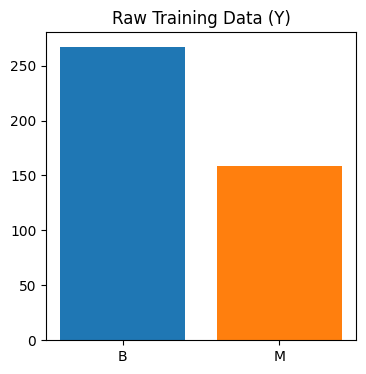

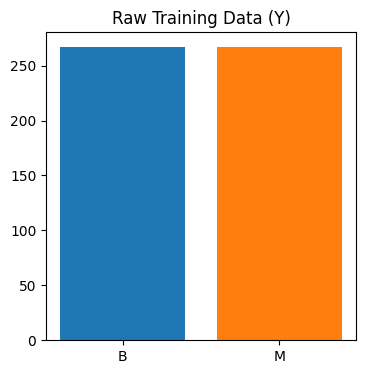

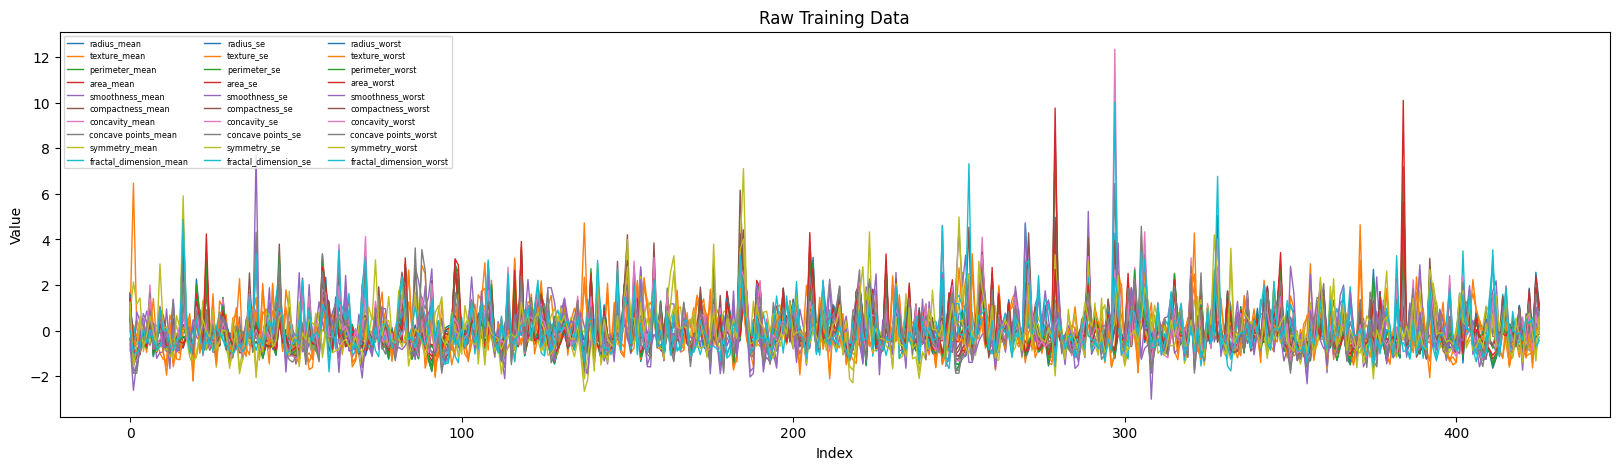

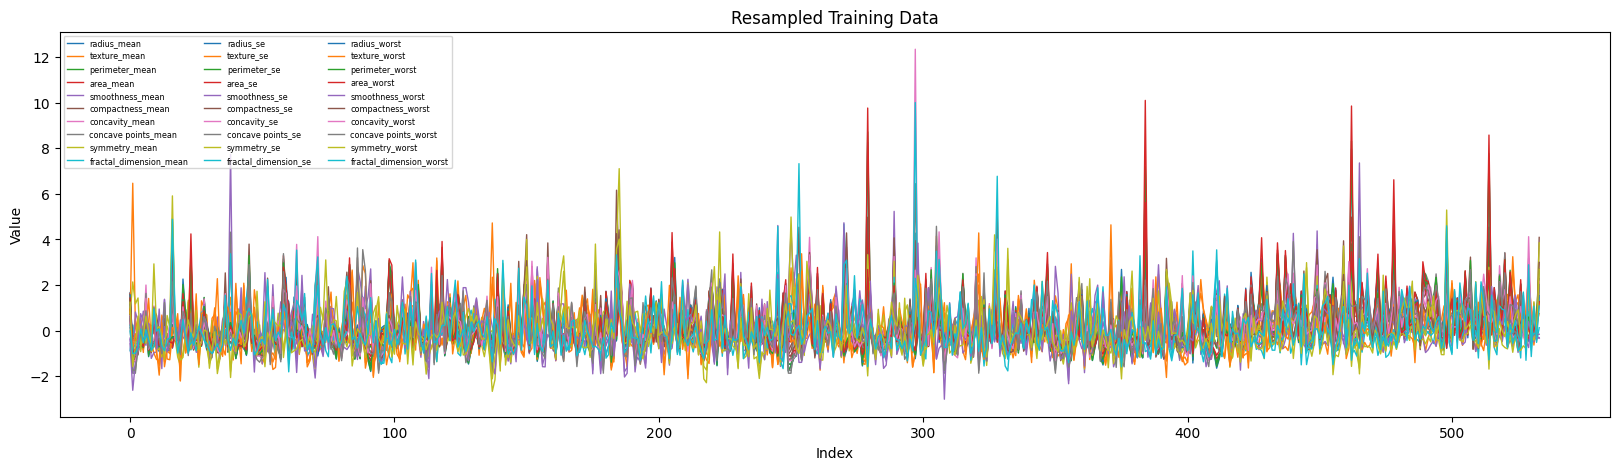

In [6]:
def plot_values(series):
    plt.figure(figsize=(4, 4))
    plt.title("Raw Training Data (Y)")
    y_counts = {"B": 0, "M": 0}
    y_values = series.values
    for val in y_values:
        if val == '0':
            y_counts["B"] += 1
        else:
            y_counts["M"] += 1
    plt.bar(x=["B"], height=y_counts["B"])
    plt.bar(x=["M"], height=y_counts["M"])
    plt.show()

plot_values(y_train)

plot_values(y_resampled)

plt.figure(figsize=(20, 5))
plt.title("Raw Training Data")
for i in range(X_train.shape[1]):
    plt.plot(X_train[:, i], label=features[i], linewidth=1)
plt.legend(loc="best", fontsize="xx-small", ncol=3)
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=(20, 5))
plt.title("Resampled Training Data")
for i in range(X_resampled.shape[1]):
    plt.plot(X_resampled[:, i], label=features[i], linewidth=1)
plt.legend(loc="best", fontsize="xx-small", ncol=3)
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

## Oversampling helps to balance the dataset
This is important for fair training as it helps discourage underfitting by reducing bias and false positives in our model.

# Step 6: Evaluation Metrics Reflection

Accuracy may not necessarily be a great performance measure for this imbalanced dataset as a model trained on such imbalanced data could develop a bias towards one outcome (in this case, Malignant diagnoses, which account for two-thirds of the dataset).

I would think to use precision and recall to better handle imbalanced data as it would give a clearer picture on how effective a model trained off that data was at predicting actual outcomes.

# STEP 7: TRAIN-VALIDATION SPLIT

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.20, random_state=35)
print(f"X_train: {X_train}")
print(f"y_train: {y_train}")
print(f"X_val: {X_val}")
print(f"y_val: {y_val}")

X_train: [[-0.72321999 -0.04705049 -0.7268743  ... -0.73720509  0.2102405
  -0.06053453]
 [ 0.24810614  0.64290747  0.19083843 ...  0.56588422 -0.35907269
  -0.28569014]
 [ 3.03275782  1.31202779  3.14534809 ...  2.58328858 -0.86512887
   1.15892135]
 ...
 [-0.16721686  1.23173725 -0.19133008 ...  0.28106067  0.9136853
  -0.22946715]
 [-0.11838884  0.8148248  -0.0453684  ...  0.57723048  0.84478127
   1.79930784]
 [-0.35450129 -0.67449549 -0.39536749 ... -0.5001563   0.19284482
  -0.79187937]]
y_train: 56     0
134    1
58     1
121    1
122    0
      ..
84     0
30     0
525    1
481    1
385    0
Name: diagnosis, Length: 427, dtype: object
X_val: [[ 5.82044607e-01  6.18396490e-01  6.69640455e-01 ...  1.38949645e+00
   2.17253296e+00  5.72757990e-01]
 [-3.84769241e-01 -4.12867136e-01 -3.74673188e-01 ... -4.90951989e-01
  -1.44551204e+00 -7.34905689e-01]
 [ 4.59251272e-04  2.97928490e-01 -2.17574173e-03 ...  2.77683599e-01
  -5.82053694e-01 -2.93907493e-01]
 ...
 [-7.64494470e-01  2.6

# STEP 8: MODEL SELECTION WITH MANUAL SEARCH

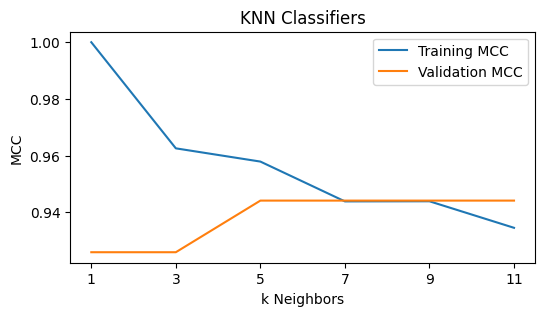

,KNN,Decision Tree,Support Vector Machine,Random Forest,AdaBoost
Score,0.944076,0.815222,0.981481,0.981481,0.944095
Parameters,{'k': 5},{'max_depth': 6},"{'kernel': 'poly', 'C': 0.1, 'degree': 2}","{'n_estimators': 50, 'max_features': 2}",{'n_estimators': 100}


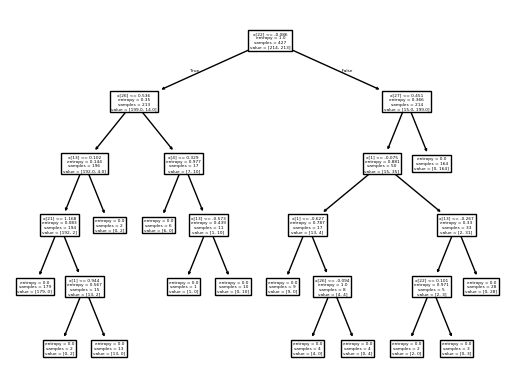

In [8]:
# 1. KNN Classifier

k_counts = [1, 3, 5, 7, 9, 11]
mcc_train_scores = list()
mcc_val_scores = list()

highest_scoring_knn = -1
highest_scoring_knn_parameters = {}

for n in range(0, len(k_counts)):
	knn = KNeighborsClassifier(n_neighbors=k_counts[n]).fit(X_train, np.asarray(y_train))
	y_pred = knn.predict(X_train)
	mcc_train_scores.append(matthews_corrcoef(y_train, y_pred))
	y_pred = knn.predict(X_val)
	mcc_val_scores.append(matthews_corrcoef(y_val, y_pred))

	if mcc_val_scores[n] > highest_scoring_knn:
		highest_scoring_knn = mcc_val_scores[n]
		highest_scoring_knn_parameters = {"k": k_counts[n]}

plt.figure(figsize=(6, 3))
plt.title("KNN Classifiers")
plt.plot(k_counts, mcc_train_scores, label="Training MCC")
plt.plot(k_counts, mcc_val_scores, label="Validation MCC")
plt.xlabel("k Neighbors"); plt.ylabel("MCC")
plt.xticks(k_counts)
plt.legend()
plt.show()

# 2. Decision Tree

depths = [2, 4, 6, 7, 10]
# decision_trees = list()
highest_scoring_tree = -1
highest_scoring_tree_parameters = {}

for max_depth in depths:
	d_tree = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=35).fit(X_train, y_train)
	plot_tree(d_tree)
	# decision_trees.append(d_tree)
	y_pred = d_tree.predict(X_val)
	tree_mcc = matthews_corrcoef(y_val, y_pred)
	if tree_mcc > highest_scoring_tree:
		highest_scoring_tree = tree_mcc
		highest_scoring_tree_parameters["max_depth"] = max_depth

# 3. Support Vector Machine
# • Polynomial kernel: C ∈ {10^(−2), 10^(−1), 1}, degree ∈ {1, 2, 3}, coef0 = 1
# • RBF kernel: C ∈ {10^(−2), 10^(−1), 1}

C_set = [10 ** -2, 10 ** -1, 1]
degrees = [1, 2, 3]

# SVC_models = [[], []]

highest_scoring_SVC = -1
highest_scoring_SVC_parameters = {}

for c in C_set:
	for degree in degrees:
		poly_SVC = SVC(C=c, kernel="poly", degree=degree, coef0=1, random_state=35).fit(X_train, y_train)
		# SVC_models[0].append(poly_SVC)

		# calculate MCC
		y_pred = poly_SVC.predict(X_val)
		poly_mcc = matthews_corrcoef(y_val, y_pred)
		if poly_mcc > highest_scoring_SVC:
			highest_scoring_SVC = poly_mcc
			highest_scoring_SVC_parameters = {"kernel": "poly", "C" : c, "degree": degree}
	rbf_SVC = SVC(C=c, kernel="rbf", random_state=35).fit(X_train, y_train)
	# SVC_models[1].append(rbf_SVC)

	# calculate MCC
	y_pred = poly_SVC.predict(X_val)
	rfb_mcc = matthews_corrcoef(y_val, y_pred)
	if rfb_mcc > highest_scoring_SVC:
		highest_scoring_SVC = rfb_mcc
		highest_scoring_SVC_parameters = {"kernel": "rfb", "C" : c}

# 4. Random Forest
# max_features ∈ {2, 4, 8, 16}, n_estimators ∈ {25, 50, 100}

max_features_set = [2, 4, 8, 16]
n_estimators_set = [25, 50, 100]

highest_scoring_forest = -1
highest_scoring_forest_parameters = {}

for max_features in max_features_set:
	for n_estimators in n_estimators_set:
		forest = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, random_state=35).fit(X_train, y_train)
		y_pred = forest.predict(X_val)
		forest_mcc = matthews_corrcoef(y_val, y_pred)
		if forest_mcc > highest_scoring_forest:
			highest_scoring_forest = forest_mcc
			highest_scoring_forest_parameters = {"n_estimators": n_estimators, "max_features": max_features}

# 5. AdaBoost
# n_estimators ∈ {10, 25, 50, 100}

n_estimators_set = [10, 25, 50, 100]

highest_scoring_boost = -1
highest_scoring_boost_parameters = {}

for n_estimators in n_estimators_set:
	adaboost = AdaBoostClassifier(n_estimators=n_estimators, random_state=35).fit(X_train, y_train)
	y_pred = adaboost.predict(X_val)
	boost_mcc = matthews_corrcoef(y_val, y_pred)
	if boost_mcc > highest_scoring_boost:
		highest_scoring_boost = boost_mcc
		highest_scoring_boost_parameters = {"n_estimators": n_estimators}


# Build Table
mcc_table = pandas.DataFrame({	"KNN": {
									"Score": highest_scoring_knn, "Parameters": highest_scoring_knn_parameters
								},
								"Decision Tree": {
									"Score": highest_scoring_tree, "Parameters": highest_scoring_tree_parameters
								},
								"Support Vector Machine": {
									"Score": highest_scoring_SVC, "Parameters": highest_scoring_SVC_parameters
								},
								"Random Forest": {
									"Score": highest_scoring_forest, "Parameters": highest_scoring_forest_parameters
								},
								"AdaBoost": {
									"Score": highest_scoring_boost, "Parameters": highest_scoring_boost_parameters
								}
							 })

mcc_table

It would appear that the best model is the Support Vector Machine, tied with the Random Forest, with both yielding the highest MCC score of 0.981481. Each model has the following parameters:

#### SVM
{'kernel': 'poly', 'C': 0.1, 'degree': 2}
#### Random Forest
{'n_estimators': 50, 'max_features': 2} 	

# STEP 9: MODEL SELECTION WITH GRID SEARCH
#### (via Cross-Validation)
##### 3-fold CV

In [9]:
param_grid_knn = [
	{"n_neighbors": [1, 3, 5, 7, 9, 11]}
]

param_grid_d_trees = [
	{"max_depth": [2, 4, 6, 7, 10]}
]

param_grid_svm = [
	{"kernel": ["poly"], "C": [10 ** -2, 10 ** -1, 1], "degree": [1, 2, 3], "coef0": [1]},
	{"kernel": ["rbf"], "C": [10 ** -2, 10 ** -1, 1]}
]

param_grid_forest = [
	{"max_features": [2, 4, 8, 16], "n_estimators": [25, 50, 100]}
]

param_grid_adaboost = [
	{"n_estimators": [10, 25, 50, 100]}
]

knn_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=3).fit(X_resampled, y_resampled) # using _resampled variables for full training set
d_tree_search = GridSearchCV(DecisionTreeClassifier(criterion="entropy", random_state=35), param_grid=param_grid_d_trees, cv=3).fit(X_resampled, y_resampled)
svm_search = GridSearchCV(SVC(random_state=35), param_grid=param_grid_svm, cv=3).fit(X_resampled, y_resampled)
forest_search = GridSearchCV(RandomForestClassifier(random_state=35), param_grid=param_grid_forest, cv=3).fit(X_resampled, y_resampled)
adaboost_search = GridSearchCV(AdaBoostClassifier(random_state=35), param_grid=param_grid_adaboost, cv=3).fit(X_resampled, y_resampled)

# gridcv_results = pandas.DataFrame({
# 	"KNN": knn_search.cv_results_,
# 	"Decision Tree": d_tree_search.cv_results_,
# 	"SVM": svm_search.cv_results_,
# 	"Random Forest": forest_search.cv_results_,
# 	"AdaBoost": adaboost_search.cv_results_
# })

# gridcv_results

knn_cv_results = pandas.DataFrame(knn_search.cv_results_)
d_tree_cv_results = pandas.DataFrame(d_tree_search.cv_results_)
svm_cv_results = pandas.DataFrame(svm_search.cv_results_)
forest_cv_results = pandas.DataFrame(forest_search.cv_results_)
adaboost_cv_results = pandas.DataFrame(adaboost_search.cv_results_)

In [10]:
knn_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003019,0.001372,0.010584,0.009309,1,{'n_neighbors': 1},0.943820,0.966292,0.977528,0.962547,0.014014,4
1,0.002658,0.001880,0.003995,0.000010,3,{'n_neighbors': 3},0.955056,0.971910,0.988764,0.971910,0.013761,1
2,0.002666,0.001885,0.003993,0.000006,5,{'n_neighbors': 5},0.943820,0.977528,0.988764,0.970037,0.019097,2
3,0.002663,0.003765,0.003994,0.000002,7,{'n_neighbors': 7},0.943820,0.971910,0.983146,0.966292,0.016539,3
4,0.002770,0.001963,0.001459,0.001798,9,{'n_neighbors': 9},0.949438,0.977528,0.943820,0.956929,0.014745,5
5,0.001331,0.001883,0.005328,0.001886,11,{'n_neighbors': 11},0.949438,0.977528,0.932584,0.953184,0.018538,6


In [11]:
d_tree_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009322,0.001883,0.000000,0.000000,2,{'max_depth': 2},0.926966,0.943820,0.848315,0.906367,0.041622,5
1,0.011988,0.003262,0.002662,0.001882,4,{'max_depth': 4},0.966292,0.938202,0.932584,0.945693,0.014745,1
2,0.010652,0.001889,0.001332,0.001884,6,{'max_depth': 6},0.943820,0.932584,0.943820,0.940075,0.005297,2
3,0.007991,0.003261,0.001332,0.001884,7,{'max_depth': 7},0.943820,0.932584,0.943820,0.940075,0.005297,2
4,0.010659,0.001877,0.002663,0.001883,10,{'max_depth': 10},0.943820,0.932584,0.943820,0.940075,0.005297,2


In [12]:
svm_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_coef0,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009317,1.885373e-03,0.001335,1.888628e-03,0.01,1.0,1.0,poly,"{'C': 0.01, 'coef0': 1, 'degree': 1, 'kernel':...",0.893258,0.887640,0.882022,0.887640,0.004587,12
1,0.005317,1.869937e-03,0.002669,1.887238e-03,0.01,1.0,2.0,poly,"{'C': 0.01, 'coef0': 1, 'degree': 2, 'kernel':...",0.921348,0.910112,0.893258,0.908240,0.011544,10
2,0.003984,1.277858e-05,0.001331,1.882447e-03,0.01,1.0,3.0,poly,"{'C': 0.01, 'coef0': 1, 'degree': 3, 'kernel':...",0.932584,0.938202,0.904494,0.925094,0.014745,9
3,0.002650,1.874179e-03,0.002663,1.882728e-03,0.10,1.0,1.0,poly,"{'C': 0.1, 'coef0': 1, 'degree': 1, 'kernel': ...",0.977528,0.977528,0.932584,0.962547,0.021187,7
4,0.002664,1.883852e-03,0.001332,1.883121e-03,0.10,1.0,2.0,poly,"{'C': 0.1, 'coef0': 1, 'degree': 2, 'kernel': ...",0.983146,0.971910,0.955056,0.970037,0.011544,6
5,0.001319,1.866038e-03,0.002675,1.891270e-03,0.10,1.0,3.0,poly,"{'C': 0.1, 'coef0': 1, 'degree': 3, 'kernel': ...",0.988764,0.971910,0.966292,0.975655,0.009549,5
6,0.003995,2.921079e-05,0.000000,0.000000e+00,1.00,1.0,1.0,poly,"{'C': 1, 'coef0': 1, 'degree': 1, 'kernel': 'p...",0.988764,0.988764,0.977528,0.985019,0.005297,1
7,0.003994,3.371748e-07,0.000000,0.000000e+00,1.00,1.0,2.0,poly,"{'C': 1, 'coef0': 1, 'degree': 2, 'kernel': 'p...",0.977528,0.977528,0.983146,0.979401,0.002648,4
8,0.003995,1.946680e-07,0.000000,0.000000e+00,1.00,1.0,3.0,poly,"{'C': 1, 'coef0': 1, 'degree': 3, 'kernel': 'p...",0.977528,0.983146,0.988764,0.983146,0.004587,2
9,0.007989,2.973602e-07,0.008519,7.499330e-04,0.01,NaN,NaN,rbf,"{'C': 0.01, 'kernel': 'rbf'}",0.932584,0.915730,0.876404,0.908240,0.023539,10


In [13]:
forest_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038625,0.001891,0.002663,1.883177e-03,2,25,"{'max_features': 2, 'n_estimators': 25}",0.977528,0.971910,0.960674,0.970037,0.007007,1
1,0.123809,0.033747,0.006987,3.556915e-03,2,50,"{'max_features': 2, 'n_estimators': 50}",0.966292,0.971910,0.955056,0.964419,0.007007,8
2,0.205348,0.050346,0.007641,4.881338e-04,2,100,"{'max_features': 2, 'n_estimators': 100}",0.977528,0.971910,0.955056,0.968165,0.009549,4
3,0.043269,0.000950,0.004006,1.573964e-05,4,25,"{'max_features': 4, 'n_estimators': 25}",0.977528,0.977528,0.949438,0.968165,0.013242,4
4,0.098524,0.021001,0.003995,2.834876e-05,4,50,"{'max_features': 4, 'n_estimators': 50}",0.977528,0.977528,0.955056,0.970037,0.010593,1
5,0.200739,0.019278,0.007983,8.550630e-06,4,100,"{'max_features': 4, 'n_estimators': 100}",0.977528,0.977528,0.955056,0.970037,0.010593,1
6,0.097124,0.009944,0.002662,1.882672e-03,8,25,"{'max_features': 8, 'n_estimators': 25}",0.971910,0.971910,0.955056,0.966292,0.007945,7
7,0.111849,0.008629,0.003994,8.920806e-07,8,50,"{'max_features': 8, 'n_estimators': 50}",0.971910,0.977528,0.943820,0.964419,0.014745,8
8,0.242343,0.031342,0.009321,1.884301e-03,8,100,"{'max_features': 8, 'n_estimators': 100}",0.977528,0.971910,0.955056,0.968165,0.009549,4
9,0.073236,0.003766,0.002663,1.882840e-03,16,25,"{'max_features': 16, 'n_estimators': 25}",0.977528,0.938202,0.955056,0.956929,0.016109,11


In [14]:
adaboost_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029295,0.001882,0.003994,9.798072e-07,10,{'n_estimators': 10},0.960674,0.932584,0.938202,0.943820,0.012136,4
1,0.073411,0.001773,0.006658,1.883908e-03,25,{'n_estimators': 25},0.971910,0.971910,0.966292,0.970037,0.002648,2
2,0.183755,0.048045,0.007989,9.733398e-07,50,{'n_estimators': 50},0.971910,0.960674,0.977528,0.970037,0.007007,3
3,0.296172,0.000802,0.015978,3.260980e-03,100,{'n_estimators': 100},0.971910,0.983146,0.977528,0.977528,0.004587,1


In [15]:
best_models_cv = pandas.DataFrame({	"KNN": {
										"Score": knn_search.best_score_, "Parameters": knn_search.best_params_, "MCC": matthews_corrcoef(y_val, knn_search.predict(X_val))
									},
									"Decision Tree": {
										"Score": d_tree_search.best_score_, "Parameters": d_tree_search.best_params_, "MCC": matthews_corrcoef(y_val, d_tree_search.predict(X_val))
									},
									"Support Vector Machine": {
										"Score": svm_search.best_score_, "Parameters": svm_search.best_params_, "MCC": matthews_corrcoef(y_val, svm_search.predict(X_val))
									},
									"Random Forest": {
										"Score": forest_search.best_score_, "Parameters": forest_search.best_params_, "MCC": matthews_corrcoef(y_val, forest_search.predict(X_val))
									},
									"AdaBoost": {
										"Score": adaboost_search.best_score_, "Parameters": adaboost_search.best_params_, "MCC": matthews_corrcoef(y_val, adaboost_search.predict(X_val))
									}
								})
best_models_cv

,KNN,Decision Tree,Support Vector Machine,Random Forest,AdaBoost
Score,0.97191,0.945693,0.985019,0.970037,0.977528
Parameters,{'n_neighbors': 3},{'max_depth': 4},"{'C': 1, 'coef0': 1, 'degree': 1, 'kernel': 'p...","{'max_features': 2, 'n_estimators': 25}",{'n_estimators': 100}
MCC,0.981481,0.981481,0.981481,1.0,1.0


The best model has remained the Support Vector Machine, although it is no longer tied with another model, and the best parameters are different now as well.

### Parameters
With a C of 1, degree of 1, and polynomail kernel, the SVM achieved an accuracy of 0.985019.

# Step 10: Final Model Evaluation

It would appear that the best model is the Support Vector Machine, with parameters C = 1, degree = 1, coef0 = 1, kernel = polynomial.

Here are the statistics:

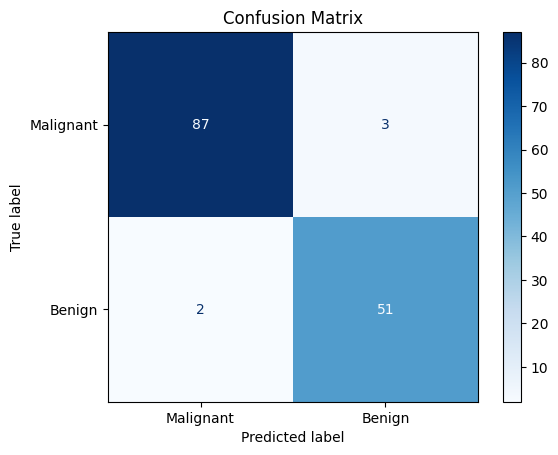

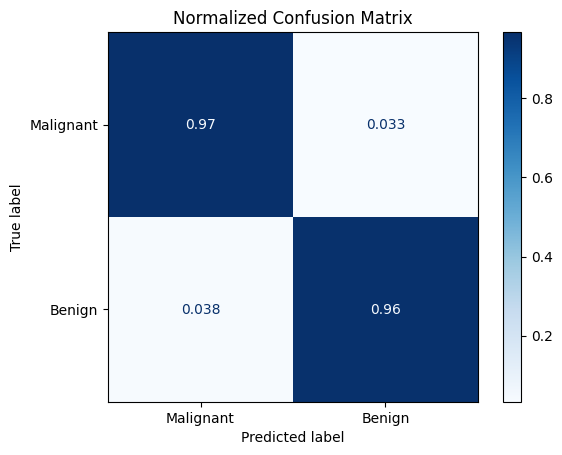

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.97      0.97        90
      Benign       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [16]:
# Matthews Correlation Coefficient
matthews_corrcoef(y_val, svm_search.predict(X_val))

matrix_params = [
    ("Confusion Matrix", None),
    ("Normalized Confusion Matrix", "true"),
]

for title, normalize in matrix_params:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm_search,
        X_test,
        y_test,
        display_labels=["Malignant", "Benign"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

plt.show()

print("Classification Report:")
print(classification_report(y_test, svm_search.predict(X_test), target_names=["Malignant", "Benign"]))

## Why did we not use the test for finding the optimal hyperparameters?

To be honest, I'm not sure what this question is asking. It would appear that, through our grid search process in step 9, we did in fact test for the optimal configuration of hyperparameters. In case this interpretation is wrong, however, then I would say that we avoided testing for optimal hyperparameters before training and testing in order to identify variances in our models caused by the different hyperparameters specified in the assignment.